In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (8, 6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from sklearn import svm

# Synthesized data points

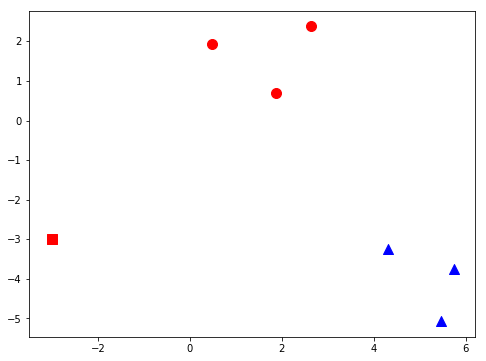

In [42]:
# we create 7 separable points
np.random.seed(1)
X = np.r_[np.random.randn(3, 2) + [1, 3], np.random.randn(3, 2) + [4, -3]]
Y = [1] * 3 + [0] * 3
#Y = [1] * 20 + [0] * 20
Test = [-3, -3]
ax = plt.subplot(111)
plt.scatter(X[0:3, 0], X[0:3, 1], s=100, c='r', marker='o')
plt.scatter(X[3:6, 0], X[3:6, 1], s=100, c='b', marker='^')
plt.scatter(Test[0], Test[1], s=100, c='r', marker='s')

In [58]:
def plot_svm(clf, X, Y, Test, fig_index=0):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-4, 7)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fig_index, figsize=(8, 6))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')
    plt.scatter(Test[0], Test[1], c='b', marker='s', s=100, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -3.5
    x_max = 6.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fig_index, figsize=(8, 6))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())

In [59]:
def drop_point(X, index):
    if isinstance(X, np.ndarray):
        return np.append(X[0:index,:], X[index+1:,:], axis=0)
    else:
        return X[0:index]+X[index+1:]

# Training on Original Dataset

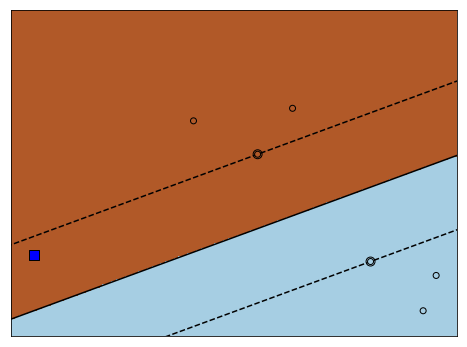

In [60]:
# soft-margin setting
#_C = 0.05
# hard-margin setting
_C = 1

clf = svm.SVC(kernel='linear', C=_C)
clf.fit(X, Y)
plot_svm(clf, X, Y, Test, fig_index=0)

In [62]:
print(X)
#X_new = drop_point(X, 4)
#Y_new = drop_point(Y, 4)

[[ 2.62434536  2.38824359]
 [ 0.47182825  1.92703138]
 [ 1.86540763  0.6984613 ]
 [ 5.74481176 -3.7612069 ]
 [ 4.3190391  -3.24937038]
 [ 5.46210794 -5.06014071]]


# Drop one Point

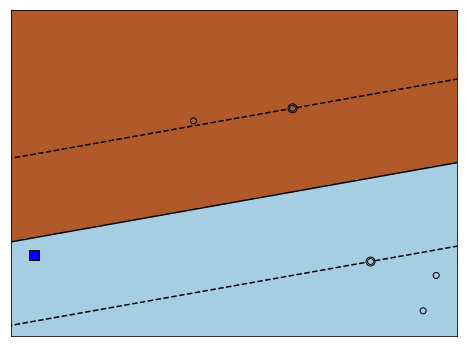

In [63]:
# soft-margin setting
#_C = 0.05
# hard-margin setting
_C = 1

clf1 = svm.SVC(kernel='linear', C=_C)
X_new = drop_point(X, 2)
Y_new = drop_point(Y, 2)

clf1.fit(X_new, Y_new)
plot_svm(clf1, X_new, Y_new, Test, fig_index=1)